# Olympic Data Analysis 

#### This is an in-depth analysis of the Summer and Winter Olympic games over the course of 120 years from 1896 to 2016

Firstly, we import our dataset and display all our columns.
Then using the describe and info functions to collect statistical information, datatypes and column names.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [4]:
mydata = pd.read_csv("C:\\Users\\BenjaminJones\\Documents\\Datasets\\120 Years O\\athlete_events.csv")

In [5]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [126]:
mydata.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [127]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Distribution of Age and Medalists
This was done by creating several dataframes for Gold, Silver, and Bronze medalists.

An extra df was created for every athlete who was awarded a medal by displaying values that did not contain a null value in the Medal column.

In [182]:
goldMedals = mydata[(mydata.Medal == 'Gold')]

In [8]:
silverMedals = mydata[(mydata.Medal == 'Silver')]

In [130]:
bronzeMedals = mydata[(mydata.Medal == 'Bronze')]

In [128]:
# df with all medals
AllMedals = mydata[(mydata.Medal.notnull())]

### Lets plot the results

The distribution of Age and their corresponding results were created using countplots.

C:\Users\BenjaminJones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


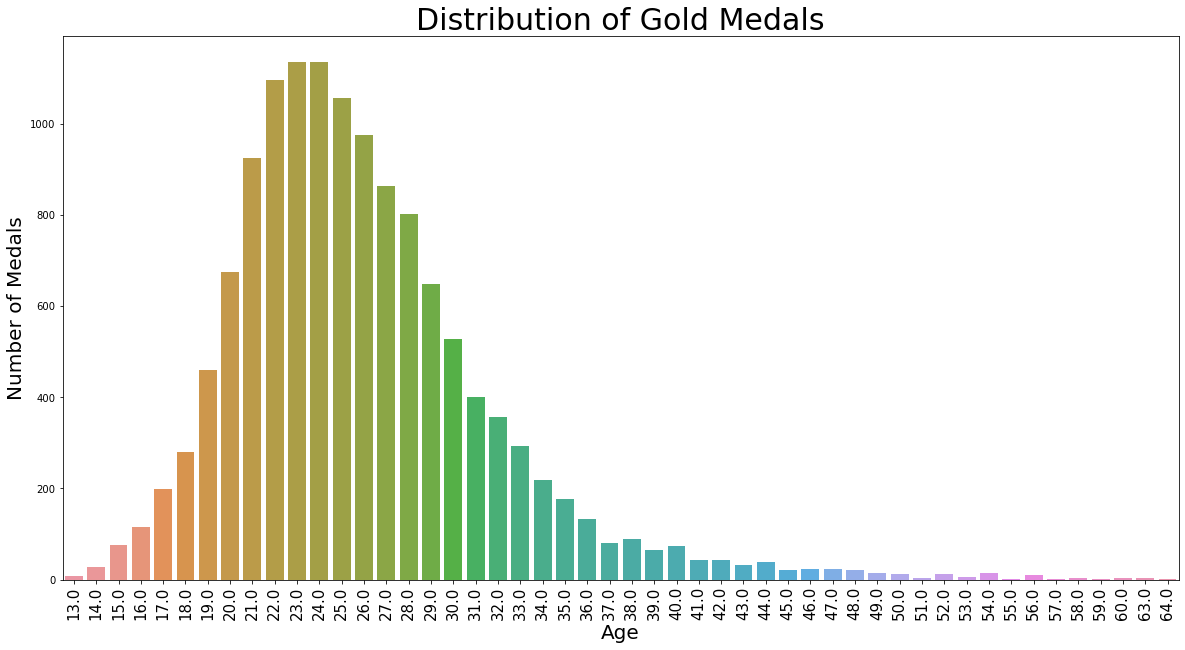

In [215]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Gold Medals', fontsize = 30)
sns.countplot(goldMedals['Age'])
plt.ylabel('Number of Medals', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.xticks(fontsize = 15, rotation = 90)
plt.show()

From the plot we can gather that the prime age for a gold medalist lies in the 24-25 year old category.

It's interesting to note here that the youngest gold medalist in history was only 13 years old!

Lets find out who they were, and what sport they were participating in, shall we?

In [214]:
youngest_gold_medalists = goldMedals[['Name','Sport','Age']].sort_values('Age')
youngest_gold_medalists
youngest_gold_medalists13 = youngest_gold_medalists[0:7]
youngest_gold_medalists13

,Name,Sport,Age
268602,Klaus Zerta,Rowing,13.0
52010,Donna Elizabeth de Varona (-Pinto),Swimming,13.0
119277,Kim Yun-Mi,Short Track Speed Skating,13.0
27207,Hans Bourquin,Rowing,13.0
73581,Fu Mingxia,Diving,13.0
78544,Marjorie Gestring (-Redlick),Diving,13.0
200704,Aileen Muriel Riggin (-Soule),Diving,13.0


Statistically speaking, it seems Diving is the most effective way of getting your kids to Olympic gold!

Let's explore the success of Silver medalists!

C:\Users\BenjaminJones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


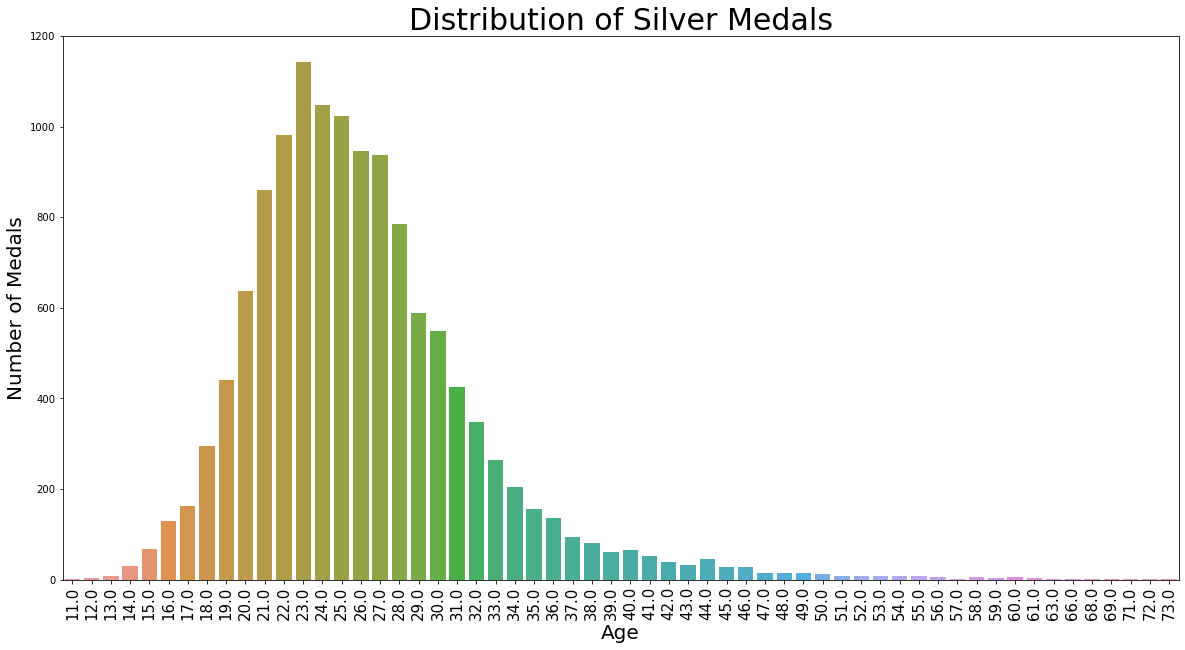

In [168]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Silver Medals', fontsize = 30)
sns.countplot(silverMedals['Age'])
plt.ylabel('Number of Medals', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.xticks(fontsize = 15, rotation = 90)
plt.show()

Here we see a much clearer difference in success where 23 year olds are stronger suited for Silver.

However we notice a much larger spread of success with the range of medalists with ages ranging from 11 to 73 years old!

Let's investigate what sport is more accommodating for those in their 70s.

In [235]:
old_silver_medalists = silverMedals[['Name','Sport','Age']].sort_values('Age', ascending = False)
old_silver_medalists
old_silver_medalists70 = old_silver_medalists[0:3]
old_silver_medalists70

,Name,Sport,Age
44584,John (Herbert Crawford-) Copley (Williamson-),Art Competitions,73.0
233395,Oscar Gomer Swahn,Shooting,72.0
150755,Charles William Martin,Sailing,71.0


Guess its time to brush up on your drawing, shooting and sailing skills. The future looks bright, anything is possible!

Last, but definitely not least! We have our Bronze medalists, let's take a look!

C:\Users\BenjaminJones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


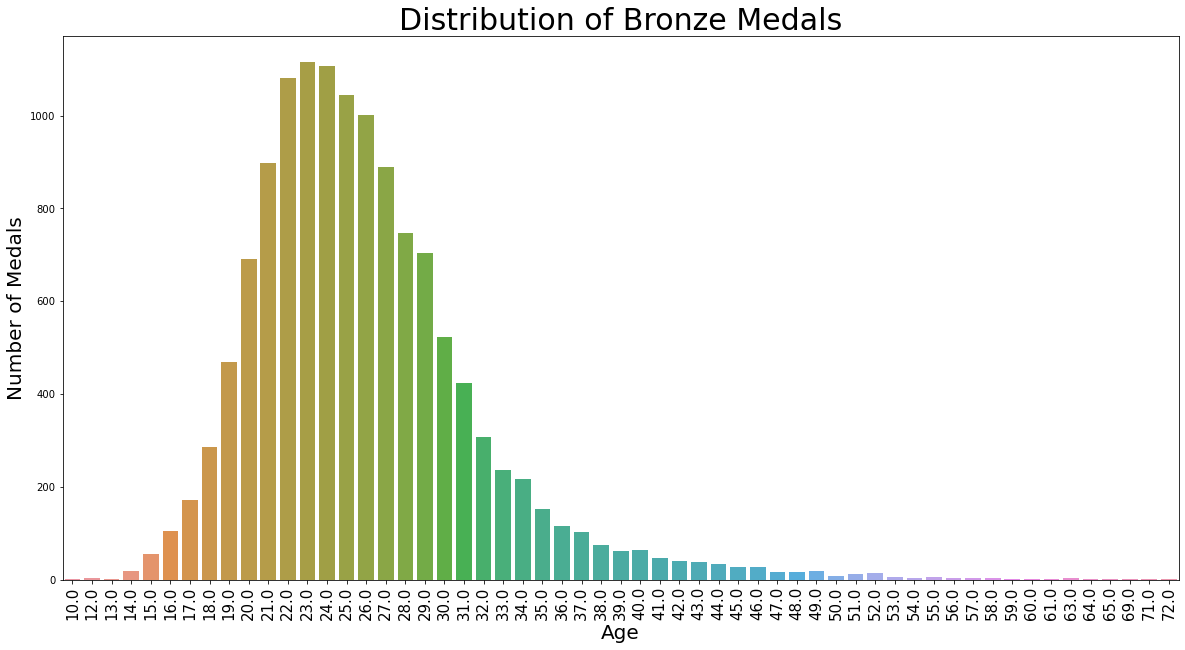

In [170]:
# Display of Bronze Medals against age over time
plt.figure(figsize=(20, 10))
plt.title('Distribution of Bronze Medals', fontsize = 30)
sns.countplot(bronzeMedals['Age'])
plt.ylabel('Number of Medals', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.xticks(fontsize = 15, rotation = 90)
plt.show()

A very similar spread to the Silvers. For a change, lets take a look the most popular sport for winning a Bronze at the ripe old age of 23.

In [240]:
bronze_medals_most = bronzeMedals['Sport'][bronzeMedals['Age'] == 23]
bronze_medals_most.mode()

0    Athletics
Name: Sport, dtype: object

No surprise there...

## Medals by country

#### Now, lets move on to region-specific medalists! Lets delve into the top 10 of all time, and lets see who reigns supreme!

This was achieved by counting the total medals and then plotting them in descending order.

In [242]:
TotalMedals = goldMedals.Team.value_counts().reset_index(name='Medal')
TotalMedals.head(10)

,index,Medal
0,United States,2474
1,Soviet Union,1058
2,Germany,679
3,Italy,535
4,Great Britain,519
5,France,455
6,Sweden,451
7,Hungary,432
8,Canada,422
9,East Germany,369


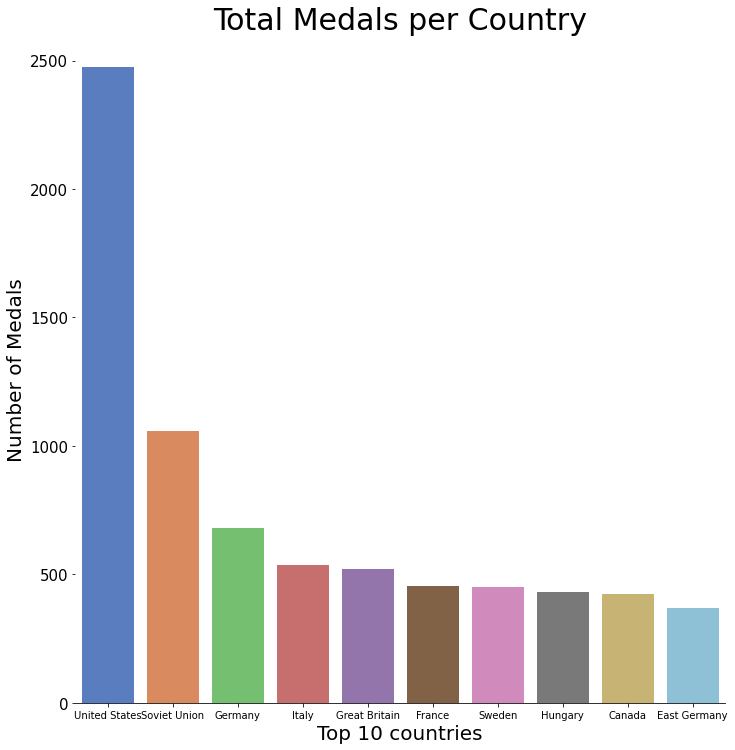

In [255]:
TotalMedals10 = TotalMedals.head(10)
g = sns.catplot(x="index", y="Medal", data=TotalMedals10,
                height=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 countries", fontsize = 20)
g.set_ylabels("Number of Medals", fontsize = 20)
plt.title('Total Medals per Country', fontsize = 30)
plt.yticks(fontsize = 15)
plt.show()

The United States of America, land of the free, top of the pops with a staggering 2474 medals! Quite impressive.

You'll notice the distinction between Germany and East Germany. Note that East Germany competed separately up until 1990, hence their large contribution! If we combine their efforts, they would only be 10 medals behind The Soviet Union with 1048!

## Variation by Gender over the years

With sporting facilities and technology becoming more competitive over the years, there may have been an increase in athleticism and physicality as time goes on. 

Let's take a look at the average weight and height for Men and Women over time.

Firstly, a df was created to separate the Men and Women, and then a box and whisker graph was plotted against time, respectively. The mean weight and height was calculated for each gender and plotted as a horizontal line for reference.

In [359]:
MaleOverTime = mydata[(mydata.Sex == 'M')]
FemaleOverTime = mydata[(mydata.Sex == 'F')]

In [384]:
Male_weight_mean = MaleOverTime['Weight'].mean()
Male_height_mean = MaleOverTime['Height'].mean()
Female_weight_mean = FemaleOverTime['Weight'].mean()
Female_height_mean = FemaleOverTime['Height'].mean()

C:\Users\BenjaminJones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BenjaminJones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


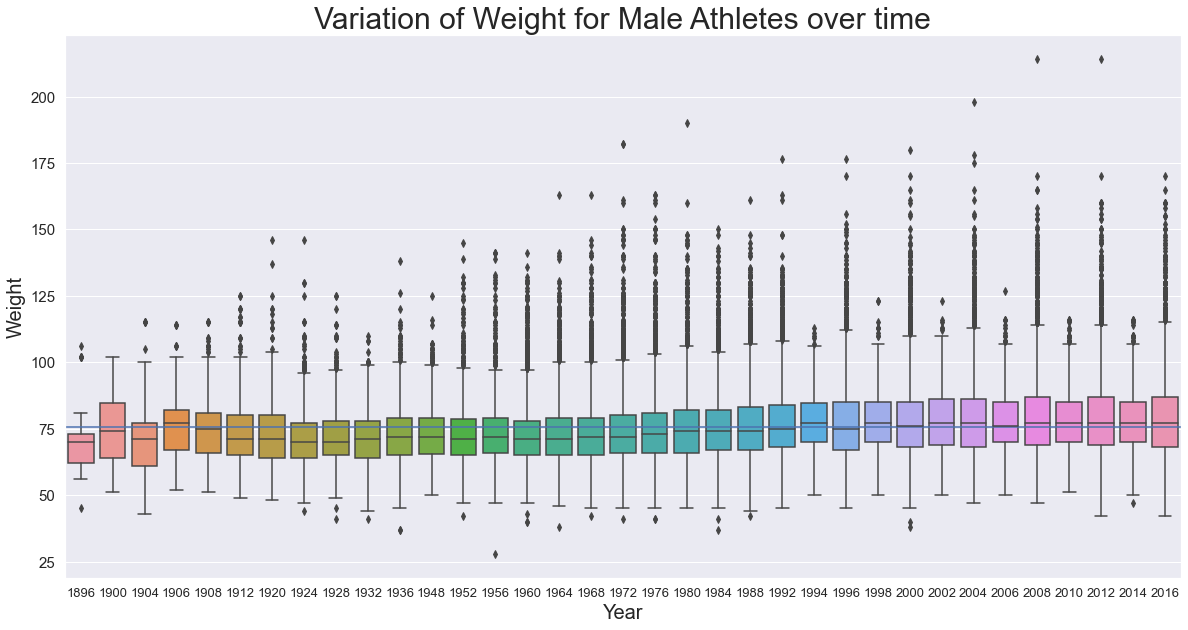

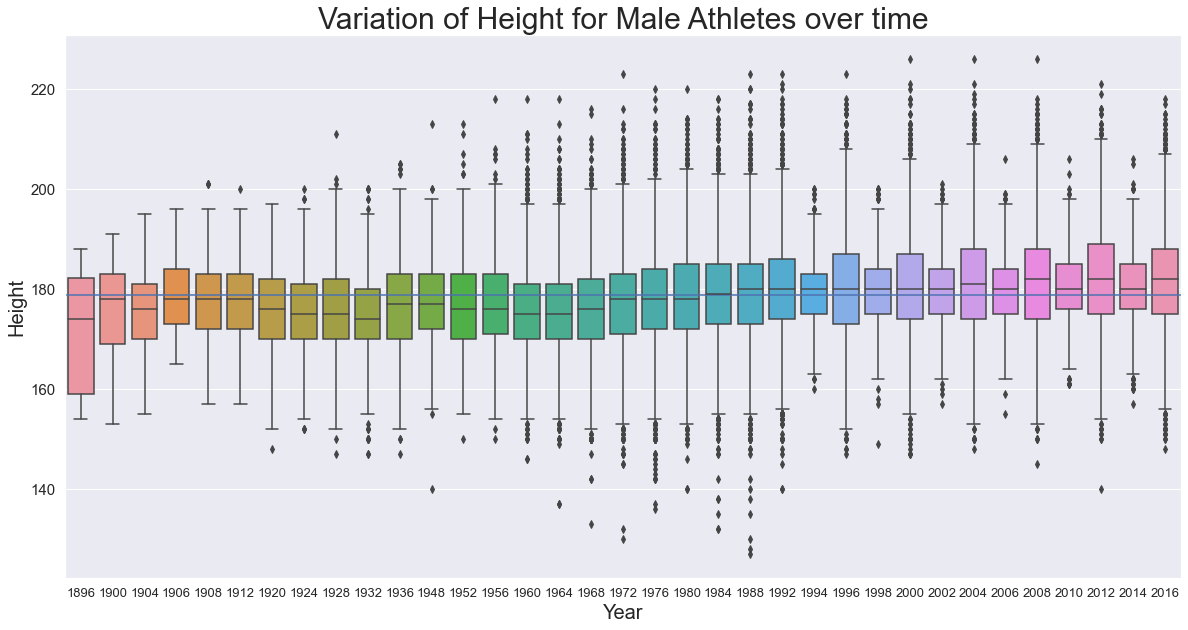

In [380]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Weight', data=MaleOverTime)
plt.title('Variation of Weight for Male Athletes over time', fontsize = 30)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Weight', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)
plt.axhline(Male_weight_mean)
#Now Height
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Height', data=MaleOverTime)
plt.title('Variation of Height for Male Athletes over time', fontsize = 30)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Height', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)
plt.axhline(Male_height_mean)


The first thing that I see is that there is a clear range from 1908 - 1992 where the male median weight was below average. From 1998 onwards we see that the weight was above average.

If we read into it more, we can see a large outlier (get it?) sitting in 2008. The heaviest male olympian of all time. Lets see where he fits a bit later on.

With height, there seems to be a point of inflection in 1984. The median of the height of these athletes all were below the average and every athlete post 1984 had median heights taller than the average.

We can also see the shortest male olympian in 1988, and we'll discover who he was in a minute.

Interesting stuff.

C:\Users\BenjaminJones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BenjaminJones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


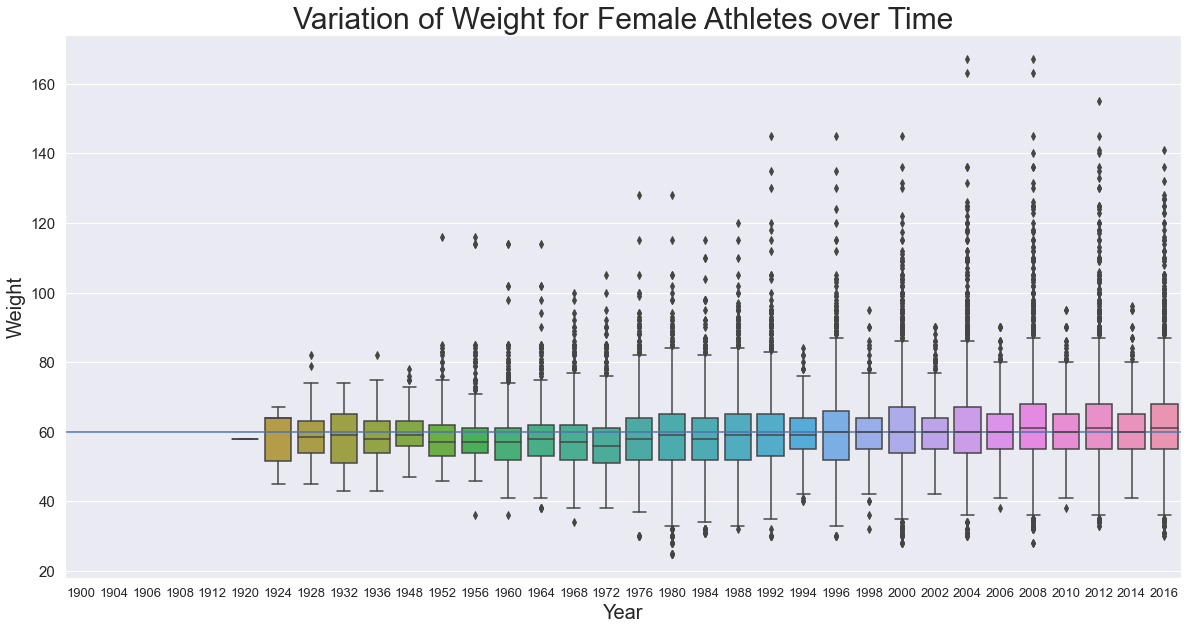

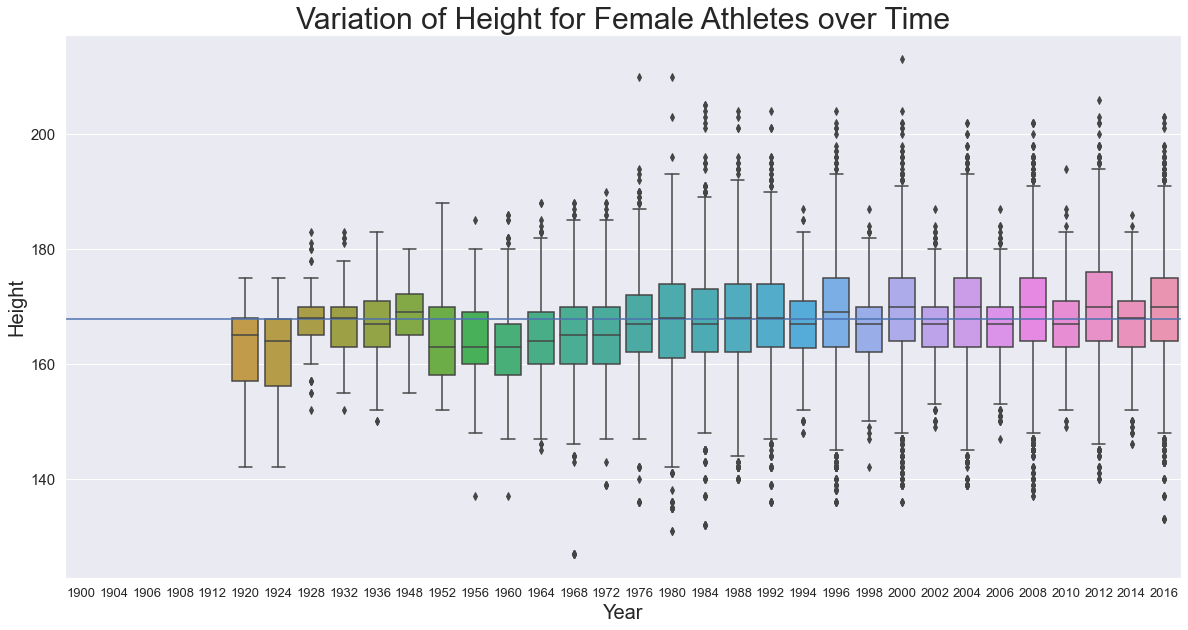

In [387]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Weight', data=FemaleOverTime)
plt.title('Variation of Weight for Female Athletes over Time', fontsize = 30)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Weight', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)
plt.axhline(Female_weight_mean)
# Height
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Height', data=FemaleOverTime)
plt.title('Variation of Height for Female Athletes over Time', fontsize = 30)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Height', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)
plt.axhline(Female_height_mean)

The obvious conclusion that can be drawn from the plot is similar to the one above. We have an observed point of inflection sitting at 1996 where pre-1996 the female median weight is below average and post 1996 it is above.

Looking at the quartiles, I notice that after 1976, most of the third quartile weights sit above 80 kgs, indicating an increase in weight over time. There is also a pattern after 1992 showing an increase followed by a decrease after 2 years. This is the alternation between the Summer and Winter Olympic games which can be attributed to the inclusion of athletic sports in Summer such as weightlifting.

This exact trend is noticed with the height. With regards to extremes, our heaviest athlete competing was in 2004 while our tallest female to compete was in the year 2000.



Time to find out about our heaviest male athlete we saw earlier on!

In [389]:
MaleOverTime[['Weight']].max()

Weight    214.0
dtype: float64

214 kgs! That's approximately 892 Big Macs!

What was his name, and what did he participate in? 

This was achieved by identifying his index and using iloc to slice the data about him.

In [393]:
MaleOverTime[['Weight']].idxmax()

Weight    23155
dtype: int64

In [392]:
HeavyAth = mydata.iloc[23155,:]
HeavyAth

ID                         12177
Name           Ricardo Blas, Jr.
Sex                            M
Age                         21.0
Height                     183.0
Weight                     214.0
Team                        Guam
NOC                          GUM
Games                2008 Summer
Year                        2008
Season                    Summer
City                     Beijing
Sport                       Judo
Event     Judo Men's Heavyweight
Medal                        NaN
Name: 23155, dtype: object

Mr. Ricardo Blas Jr. Competing in Judo in the 2008 Summer Olympic Games. 

This led to me ask, does this weight advantage play a factor in success? My first thought was no, seeing as Ricardo was unable to attain a medal, but lets explore the spread of other athletes in relationship to the average.

C:\Users\BenjaminJones\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


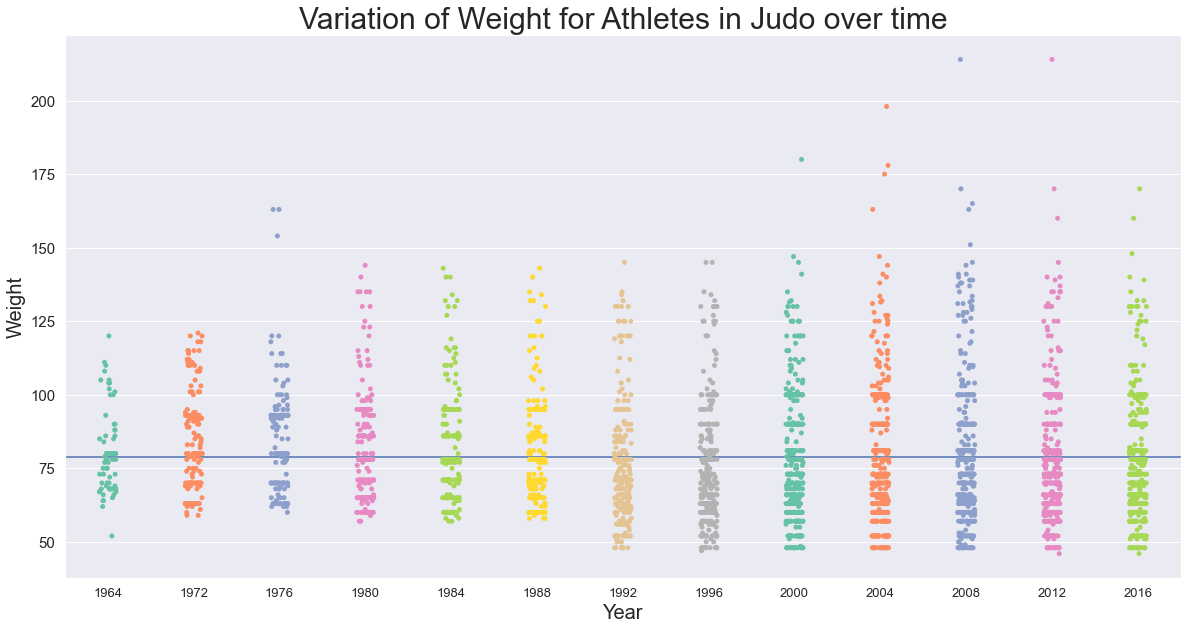

In [410]:
JudoAth = mydata[(mydata.Sport == 'Judo')]
JudoAth_mean = JudoAth['Weight'].mean()

plt.figure(figsize=(20, 10))
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 15)
sns.stripplot('Year', 'Weight', data=JudoAth, palette='Set2')
plt.title('Variation of Weight for Athletes in Judo over time', fontsize = 30)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Weight', fontsize = 20)
plt.axhline(JudoAth_mean)



